In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#read the training set into a data frame
df = pd.read_csv('/home/khalaq04/Downloads/weatherAUS.csv')

#first 5 observations
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
#last 5 observations
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [3]:
#removing useless features from the dataset
df = df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)

#sample of the new dataframe
df.head(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No


In [4]:
#replacing the null values with mean values of every column
df.fillna(value=df.mean(), inplace=True)

#displaying the first five observations of the new dataframe
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [5]:
#to change the strings in the dataset to integers(i.e. to change yes to 1 and no to 0) and to replace the null values
df.RainToday = [1 if data == 'Yes' else 0 for data in df.RainToday]
df.RainTomorrow = [1 if data == 'Yes' else 0 for data in df.RainTomorrow]
df.fillna(value=df.mean(), inplace=True)

#displaying a sample of the new dataframe
df.head(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.50993,16.9,21.8,0,0


In [6]:
#description of the dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390,0.219167,0.219146
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000,0.000000,0.000000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


In [7]:
#standardizing/scaling the dataset
ss = StandardScaler()
new_df = ss.fit_transform(df)

#sample of the new dataframe
pd.DataFrame(new_df).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.189447,-0.045336,-0.210072,-2.809331e-16,-6.508050e-16,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,-8.487347e-16,-0.014053,0.017023,-0.529795,-0.529764
1,-0.753101,0.265043,-0.281650,-2.809331e-16,-6.508050e-16,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,-3.920285e-16,-8.487347e-16,0.032464,0.381985,-0.529795,-0.529764
2,0.110901,0.349692,-0.281650,-2.809331e-16,-6.508050e-16,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,-3.920285e-16,-1.199232e+00,0.621685,0.221402,-0.529795,-0.529764


Text(0.5, 1.0, 'Elbow Curve')

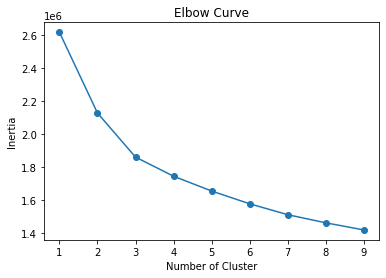

In [8]:
#using different kmeans algorithms and storing their inertia values to plot the elbow curve
IV =[]
for nclusters in range(1,10):
    kmeans = KMeans(n_clusters = nclusters,init = 'k-means++')
    kmeans.fit(new_df)
    IV.append(kmeans.inertia_)
    
#plotting the elbow curve
plot_frame = pd.DataFrame({'Cluster':range(1,10),'Inertia Value':IV})
plt.plot(plot_frame['Cluster'],plot_frame['Inertia Value'],marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

In [9]:
# applying kmeans clustering using 3 clusters
kmeans = KMeans(n_clusters = 3,init = 'k-means++')
kmeans.fit(new_df)
predictions = kmeans.predict(new_df)

#to display the number of points in each cluster
count_df= pd.DataFrame(new_df)
count_df['cluster'] = predictions
count_df['cluster'].value_counts()

1    56574
2    53960
0    34926
Name: cluster, dtype: int64

In [10]:
#to display the centroids of the clusters
print(kmeans.cluster_centers_)

[[ 0.12983824 -0.48113121  0.67344513 -0.25196401 -0.74787884  0.60491421
   0.43643579  0.39775035  0.58173457  0.8882858  -0.60778734 -0.47642915
   0.67163868  0.68084149 -0.16830696 -0.53344921  1.00552618  1.03821867]
 [-0.73229618 -0.59993654 -0.20075099 -0.36419032 -0.03953168 -0.52785271
  -0.40224369 -0.42437885  0.2975985   0.03472104  0.73387027  0.73002402
  -0.05342257 -0.05613779 -0.71274195 -0.55603447 -0.25327334 -0.3318324 ]
 [ 0.68487408  0.94152044 -0.22528767  0.54557783  0.52579669  0.16256368
   0.13976506  0.18805879 -0.68919459 -0.61166528 -0.37703272 -0.45805448
  -0.37882068 -0.38192879  0.85740396  0.92929925 -0.38517428 -0.32385295]]
